In [2]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [4]:
orb = cv2.ORB_create()

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)

images = ['book1.jpg', 'book2.jpg', 'book3.jpg', 'book4.jpg']

database_kp = []
database_desc = []
for name in images :
    img = cv2.imread(name,cv2.IMREAD_GRAYSCALE)
    keypoints, desc = orb.detectAndCompute(img, None)
    database_kp.append(keypoints)
    database_desc.append(desc)

In [9]:
test = cv2.imread("book1_1test.jpg", cv2.IMREAD_GRAYSCALE)
keypoints, desc = orb.detectAndCompute(test, None)

22.68
55.86
61.98
44.16


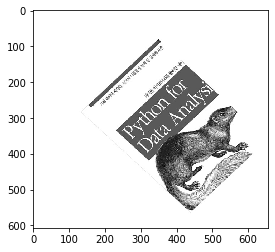

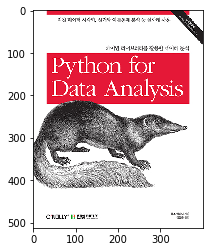

In [10]:
min_distance = 1000
idx = -1
for i in range(len(images)) :   
    matches = matcher.match(desc, database_desc[i])
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:50]
    
    distance = 0
    for d  in good_matches :
        distance += d.distance
    distance /= len(good_matches)
    print(distance)
        
    if  min_distance > distance :
        min_distance = distance
        idx = i

imshow("", test  )
imshow("", cv2.imread(images[idx])      )

In [13]:
test = cv2.imread("book4_1test.png", cv2.IMREAD_GRAYSCALE)
keypoints, desc = orb.detectAndCompute(test, None)

46.18
39.16
52.14
22.72


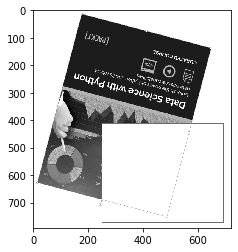

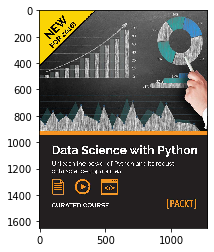

In [14]:
min_distance = 1000
idx = -1
for i in range(len(images)) :   
    matches = matcher.match(desc, database_desc[i])
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:50]
    
    distance = 0
    for d  in good_matches :
        distance += d.distance
    distance /= len(good_matches)
    print(distance)
        
    if  min_distance > distance :
        min_distance = distance
        idx = i

imshow("", test  )
imshow("", cv2.imread(images[idx])      )

In [17]:
src1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)

keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

matches = matcher.match(desc1, desc2)
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:50]

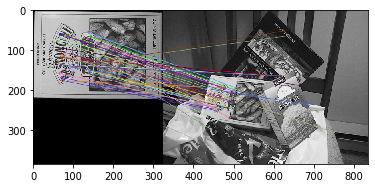

In [31]:
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None,
                     flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow("", dst)

In [22]:
pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)


print(pts1.shape)  # 50,1,2
print(pts2.shape)
print('\n')
print(pts1)

(50, 1, 2)
(50, 1, 2)


[[[141.00482  155.52002 ]]

 [[139.96802   55.296005]]

 [[134.36931   87.09122 ]]

 [[ 70.84801  167.61601 ]]

 [[143.07841   66.35521 ]]

 [[127.87201   63.936005]]

 [[134.78401  150.33601 ]]

 [[ 89.85601  162.43202 ]]

 [[128.56322   64.28161 ]]

 [[ 64.28161   68.42881 ]]

 [[141.69601  155.52002 ]]

 [[ 88.128006  62.208008]]

 [[143.42401   65.66401 ]]

 [[ 74.30401  103.68001 ]]

 [[126.48962  155.52002 ]]

 [[ 63.936005  69.12001 ]]

 [[ 74.4      176.40001 ]]

 [[126.14401  155.52002 ]]

 [[ 64.28161  145.15202 ]]

 [[134.78401   72.57601 ]]

 [[136.8      132.      ]]

 [[ 74.880005 175.68001 ]]

 [[136.51201  127.87201 ]]

 [[ 65.66401  157.24802 ]]

 [[ 74.64961  116.12161 ]]

 [[ 76.032005 115.77601 ]]

 [[ 76.72321  134.78401 ]]

 [[ 60.480007  77.76001 ]]

 [[145.15201   58.752007]]

 [[136.85762  147.22562 ]]

 [[ 70.50241  118.19521 ]]

 [[ 70.50241  114.04802 ]]

 [[ 66.35521  157.59363 ]]

 [[ 80.870415  64.28161 ]]

 [[122.42538   98.5375  

In [24]:
H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

print(H)

[[ 4.85610150e-01 -1.26423343e-01  1.16639863e+02]
 [ 3.62734153e-02  4.76039278e-01  1.58710108e+02]
 [-1.20390936e-04 -1.08741047e-04  1.00000000e+00]]


In [28]:
(h, w) = src1.shape[:2]
corners1 = np.array([[0,0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1,1,2).astype('float') # 변환되기 전 그림에서 코너 좌표
corners2 = cv2.perspectiveTransform(corners1, H)

print(corners1)
print('\n')
print(corners2)

[[[  0.   0.]]

 [[  0. 222.]]

 [[323. 222.]]

 [[323.   0.]]]


[[[116.63986265 158.71010833]]

 [[ 90.7649939  270.9312472 ]]

 [[261.93487172 294.67986571]]

 [[284.55731437 177.32180552]]]


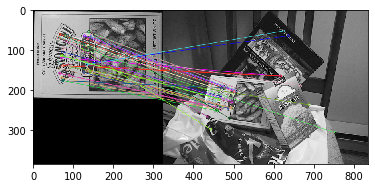

In [33]:
# 위에서 이미 이 코드를 썼지만 밑의 셀의 아웃풋과 비교하기 위해서 다시 한 번 씀
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None,
                     flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow("", dst)

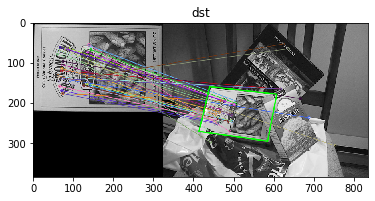

In [32]:
corners3 = corners2 + np.float32([w, 0])

cv2.polylines(dst, [np.int32(corners3)], True, (0,255,0), 2, cv2.LINE_AA)

imshow('dst', dst)

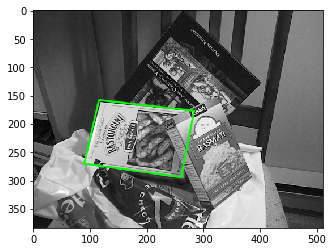

In [88]:
test = cv2.imread('box_in_scene.png')
cv2.polylines(test, [np.int32(corners2)], True, (0,255,0), 2, cv2.LINE_AA)
imshow("", test)

In [93]:
def matching(A, B):
    src1 = cv2.imread(A)
#     src2 = cv2.imread(B, cv2.IMREAD_GRAYSCALE)
    src2 = cv2.imread(B)
    test = cv2.imread(B)
    
    keypoints1, desc1 = orb.detectAndCompute(src1, None)
    keypoints2, desc2 = orb.detectAndCompute(src2, None)

    matches = matcher.match(desc1, desc2)
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:50]
    
    pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
    pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)   
    
    H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)
    
    (h, w) = src1.shape[:2]
    corners1 = np.array([[0,0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1,1,2).astype('float') # 변환되기 전 그림에서 코너 좌표
    corners2 = cv2.perspectiveTransform(corners1, H)

    dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None,
                     flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    corners3 = corners2 + np.float32([w, 0])
    
    cv2.polylines(dst, [np.int32(corners3)], True, (0,255,0), 5, cv2.LINE_AA)
    imshow("", dst)
    plt.show()
    
    cv2.polylines(test, [np.int32(corners2)], True, (0,255,0), 5, cv2.LINE_AA)
    imshow("", test)

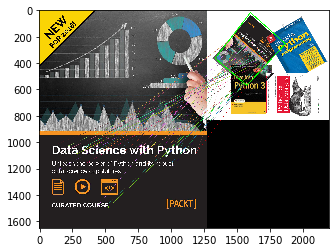

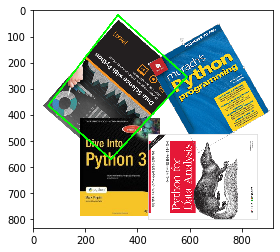

In [94]:
matching('book4.jpg', 'books.png')